Use this tutorial to make Tensorflow work on M1/M2 Macs: https://www.youtube.com/watch?v=o4-bI_iZKPA

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

ModuleNotFoundError: No module named 'cv2'

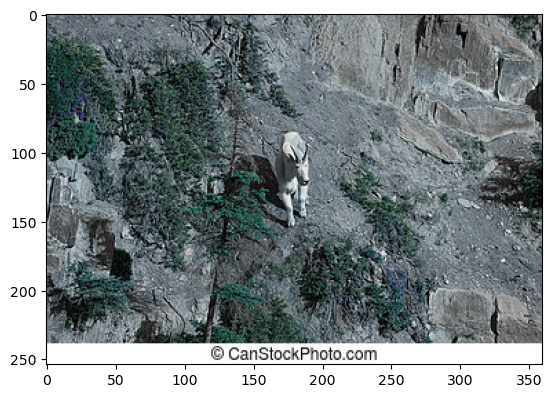

In [ ]:
data_dir = '/Users/trev/Documents/goat_images'
categories = ['Billy', 'Not_Billy']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))#, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

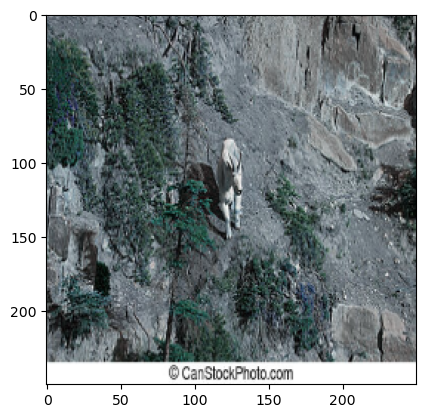

In [ ]:
img_size = 250

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)#, cmap='gray')
plt.show()

In [ ]:
train_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))#, cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                train_data.append([new_array, class_num])
            except:
                pass

create_training_data()

In [ ]:
print(len(train_data))

981


In [ ]:
import random

random.shuffle(train_data)

In [ ]:
for sample in train_data[:10]:
    print(sample[1])

0
0
0
1
0
0
0
0
0
0


In [ ]:
X = []
y = []

for features, label in train_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
X_train = X_train/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

epochs=10

history = model.fit(X_train, y_train, batch_size = 64, epochs = epochs, validation_split = 0.1)

2023-07-15 20:44:16.561985: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-15 20:44:16.562008: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-15 20:44:16.562013: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-15 20:44:16.562240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-15 20:44:16.562267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/2


2023-07-15 20:44:17.361428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 7s 380ms/step - loss: 6.7730 - accuracy: 0.5019 - val_loss: 0.6938 - val_accuracy: 0.4831
Epoch 2/2


2023-07-15 20:44:23.916205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 4s 276ms/step - loss: 0.6803 - accuracy: 0.5776 - val_loss: 0.7193 - val_accuracy: 0.6180


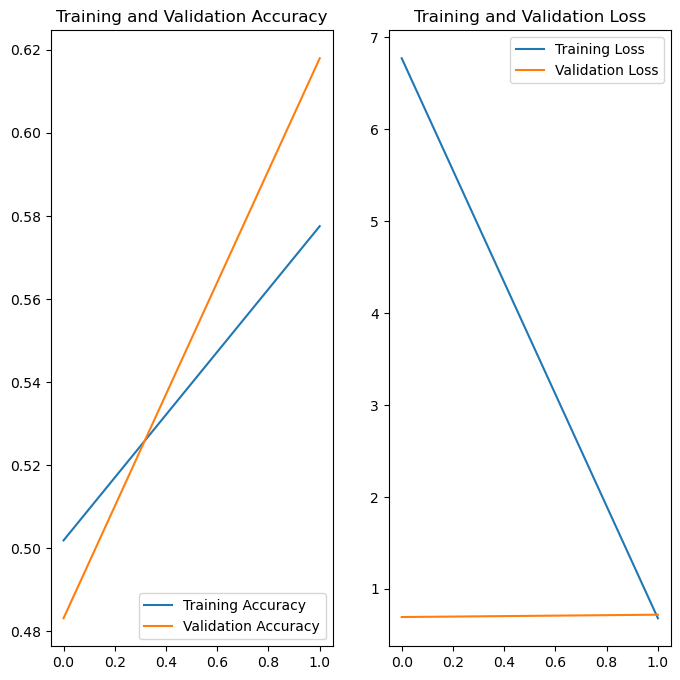

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred = model.predict(X_test)


1/4 [======>.......................] - ETA: 0s

2023-07-15 20:45:33.888623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 106ms/step


In [ ]:
for pred in y_pred:
    score = tf.nn.softmax(y_pred[0])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(categories[np.argmax(score)], 100 * np.max(score))
    )

This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Billy with a 100.00 percent confidence.
This image most likely belongs to Bill